In [1]:
import pyemu
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import flopy as fp
from flopy.utils.reference import SpatialReference
import os
import sys
from shutil import copyfile
import fileinput

sys.path.append("../../modules")
# hand made functions
from Rouss import *

flopy is installed in C:\Users\emmal\Anaconda3\lib\site-packages\flopy


In [2]:
ws = "workspace"
m_n_i = "pest_3d_r"
m_n = "pest_3D_R"

case = "3D_test"

In [3]:
sim = fp.mf6.MFSimulation.load(sim_ws=ws)
m = sim.get_model(m_n_i)

loading simulation...
  loading simulation name file...
  loading tdis package...
  loading model gwf6...
    loading package dis...
    loading package ic...
    loading package oc...
    loading package npf...
    loading package wel...
    loading package rch...
    loading package rch...
    loading package rch...
    loading package wel...
    loading package chd...
    loading package chd...
    loading package drn...
    loading package riv...
    loading package riv...
    loading package riv...
    loading package riv...
    loading package riv...
    loading package riv...
    loading package obs...
  loading ims package pest_3d_r...


In [4]:
sr = SpatialReference(delr=m.dis.delr.array, delc=m.dis.delc.array, xll=m.dis.xorigin.array, yll=m.dis.yorigin.array)
sr

xul:664525; yul:6207475; rotation:0; proj4_str:None; units:meters; lenuni:2; length_multiplier:1.0

In [5]:
# empty pst object
template_ws = "template"
pf = pyemu.prototypes.PstFrom(original_d=ws, new_d=template_ws,
                 remove_existing=True,
                 longnames=True, spatial_reference=sr,
                 zero_based=False)

2020-08-05 13:16:09.563866 starting: opening PstFrom.log for logging
2020-08-05 13:16:09.564867 starting PstFrom process
2020-08-05 13:16:09.568867 starting: setting up dirs
2020-08-05 13:16:09.568867 starting: removing existing new_d 'template'
2020-08-05 13:16:09.694863 finished: removing existing new_d 'template' took: 0:00:00.125996
2020-08-05 13:16:09.694863 starting: copying original_d 'workspace' to new_d 'template'
2020-08-05 13:16:10.080851 finished: copying original_d 'workspace' to new_d 'template' took: 0:00:00.385988
2020-08-05 13:16:10.082851 finished: setting up dirs took: 0:00:00.513984


In [6]:
#add observation
#Quat
df = pd.read_csv(os.path.join(template_ws,"heads_q.csv"),index_col=0)
hds_df = pf.add_observations("heads_q.csv",insfile="heads_q.csv.ins",index_cols="time",
                use_cols=list(df.columns.values),prefix="quat",obsgp=True)
#P
df = pd.read_csv(os.path.join(template_ws,"heads_pc.csv"),index_col=0)
hds_df = pf.add_observations("heads_pc.csv",insfile="heads_pc.csv.ins",index_cols="time",
                use_cols=list(df.columns.values),prefix="pc",obsgp=True)

#Q map
file = "heads_map_q.csv"
df = pd.read_csv(os.path.join(template_ws,file),index_col=0)
hds_df = pf.add_observations(file,insfile="{}.ins".format(file),index_cols="time",
                use_cols=list(df.columns.values),prefix="qmap",obsgp=True)

#P map
# file = "heads_map_p.csv"
# df = pd.read_csv(os.path.join(template_ws,file),index_col=0)
# hds_df = pf.add_observations(file,insfile="{}.ins".format(file),index_cols="time",
#                 use_cols=list(df.columns.values),prefix="Pmap",obsgp=True)

#pf.obs_dfs[2].weight = 0.5 # set a weaker weigth to these points

2020-08-05 13:16:10.142849 starting: adding observations from tabular output file
2020-08-05 13:16:10.143849 starting: reading list template\heads_q.csv
2020-08-05 13:16:10.155848 finished: reading list template\heads_q.csv took: 0:00:00.011999
2020-08-05 13:16:10.156849 starting: building insfile for tabular output file heads_q.csv
2020-08-05 13:16:10.243846 finished: building insfile for tabular output file heads_q.csv took: 0:00:00.086997
2020-08-05 13:16:10.244845 starting: adding observation from instruction file 'template\heads_q.csv.ins'
2020-08-05 13:16:10.269846 finished: adding observation from instruction file 'template\heads_q.csv.ins' took: 0:00:00.025001
2020-08-05 13:16:10.274844 finished: adding observations from tabular output file took: 0:00:00.131995
2020-08-05 13:16:10.286844 starting: adding observations from tabular output file
2020-08-05 13:16:10.286844 starting: reading list template\heads_pc.csv
2020-08-05 13:16:10.294844 finished: reading list template\heads_p

In [7]:
#P map
file = "heads_map_p.csv"
df = pd.read_csv(os.path.join(template_ws,file),index_col=0)
hds_df = pf.add_observations(file,insfile="{}.ins".format(file),index_cols="time",
                use_cols=list(df.columns.values),prefix="pmap",obsgp=True)

2020-08-05 13:16:10.584836 starting: adding observations from tabular output file
2020-08-05 13:16:10.585835 starting: reading list template\heads_map_p.csv
2020-08-05 13:16:10.609835 finished: reading list template\heads_map_p.csv took: 0:00:00.024000
2020-08-05 13:16:10.610835 starting: building insfile for tabular output file heads_map_p.csv
2020-08-05 13:16:10.654833 finished: building insfile for tabular output file heads_map_p.csv took: 0:00:00.043998
2020-08-05 13:16:10.655834 starting: adding observation from instruction file 'template\heads_map_p.csv.ins'
2020-08-05 13:16:10.694832 finished: adding observation from instruction file 'template\heads_map_p.csv.ins' took: 0:00:00.038998
2020-08-05 13:16:10.699832 finished: adding observations from tabular output file took: 0:00:00.114996


In [8]:
def chInsfle(file):
    
    """
    change a ins file create with PstFrom (only for a model with 1 stress period)
    in the right format to be used by PEST
    """
    
    fileout = "tmp"
    with open(file) as f:
        with open(fileout,"w") as fout:
            for i,line in enumerate(f):
                if i < 2:
                    fout.write(line)
                if i > 1:
                    for o,split in enumerate(line.split("w")):
                        if o == 1:
                            fout.write("~,~")
                        fout.write(split)
                        
    from shutil import copyfile
    copyfile(fileout, file) # copy 
    os.remove(fileout) # delete tmp file

chInsfle("template/heads_pc.csv.ins")
chInsfle("template/heads_q.csv.ins")
chInsfle("template/heads_map_q.csv.ins")
chInsfle("template/heads_map_p.csv.ins")

pf.obs_dfs[0].obgnme = "Quat"
pf.obs_dfs[1].obgnme = "Pc"
pf.obs_dfs[2].obgnme = "Qmap"
pf.obs_dfs[3].obgnme = "Pmap"

In [9]:
pf.build_pst("{}.pst".format(case))

noptmax:30, npar_adj:0, nnz_obs:522


### Parameters

C:\Users\emmal\Anaconda3\lib\site-packages\pyemu\utils\geostats.py:244: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


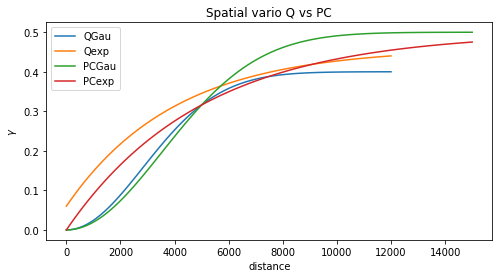

In [10]:
fig,ax = plt.subplots(figsize=(8,4))

#q
vq1 = pyemu.geostats.GauVario(a=4000,contribution=0.4)
vq2 = pyemu.geostats.ExpVario(a=4000,contribution=0.4)
grid_q1 = pyemu.geostats.GeoStruct(variograms=vq1, transform='log')
grid_q2 = pyemu.geostats.GeoStruct(variograms=vq2,nugget=0.06 , transform='log')
b=grid_q1.plot()
b=grid_q2.plot()

#pc
vp1 = pyemu.geostats.GauVario(a=5000,contribution=0.5)
vp2 = pyemu.geostats.ExpVario(a=5000,contribution=0.5)
grid_pc1 = pyemu.geostats.GeoStruct(variograms=vp1, transform='log')
grid_pc2 = pyemu.geostats.GeoStruct(variograms=vp2, transform='log')
a=grid_pc1.plot()
a=grid_pc2.plot()

a.set_title("Spatial vario Q vs PC")
plt.legend(["QGau","Qexp","PCGau","PCexp"])

In [11]:
## pp quat
zq = m.dis.idomain.array[1] # zone array for pp
zq[:,140:]=0
zq[zq<0]=0
#plt.imshow(zq)
pf.add_parameters(filenames="kq.txt",par_type="pilotpoint",pp_space=9,zone_array=zq,
                   par_name_base="kp_q",pargp="pp_q",
                   upper_bound=3,lower_bound=0.005,ult_ubound=6e-3,ult_lbound=1e-5,geostruct=grid_q1)

2020-08-05 13:16:12.468778 starting: adding pilotpoint type multiplier style parameters for file(s) ['kq.txt']
2020-08-05 13:16:12.469777 starting: loading array template\kq.txt
2020-08-05 13:16:12.564774 finished: loading array template\kq.txt took: 0:00:00.094997
2020-08-05 13:16:12.564774 loaded array 'kq.txt' of shape (182, 183)
2020-08-05 13:16:12.975761 starting: writing array-based template file 'kp_q_inst0_pilotpoint.csv.tpl'
2020-08-05 13:16:12.976761 starting: setting up pilot point parameters
2020-08-05 13:16:12.976761 No spatial reference (containing cell spacing) passed.
2020-08-05 13:16:12.976761 OK - using spatial reference in parent object.
2020-08-05 13:16:13.755737 113 pilot point parameters created
2020-08-05 13:16:13.757737 pilot point 'pargp':kp_q_inst:0
2020-08-05 13:16:13.757737 finished: setting up pilot point parameters took: 0:00:00.780976
2020-08-05 13:16:13.832735 starting: calculating factors for pargp=kp_q_inst:0
2020-08-05 13:16:13.832735 saving krige var

In [12]:
## pp pc
zpc = m.dis.idomain.array[3] # zone array for pp
zpc[:,140:]=0
zpc[zpc<0]=0
#plt.imshow(zpc)

pf.add_parameters(filenames="kpc.txt",par_type="pilotpoint",pp_space=9,zone_array=zpc,
                   par_name_base="kp_pc",pargp="pp_pc",
                   upper_bound=50,lower_bound=0.05,ult_ubound=5e-4,ult_lbound=5e-7,geostruct=grid_pc1)

2020-08-05 13:17:54.141587 starting: adding pilotpoint type multiplier style parameters for file(s) ['kpc.txt']
2020-08-05 13:17:54.142587 starting: loading array template\kpc.txt
2020-08-05 13:17:54.234584 finished: loading array template\kpc.txt took: 0:00:00.091997
2020-08-05 13:17:54.235584 loaded array 'kpc.txt' of shape (182, 183)
2020-08-05 13:17:54.325581 starting: writing array-based template file 'kp_pc_inst0_pilotpoint.csv.tpl'
2020-08-05 13:17:54.326581 starting: setting up pilot point parameters
2020-08-05 13:17:54.326581 No spatial reference (containing cell spacing) passed.
2020-08-05 13:17:54.327581 OK - using spatial reference in parent object.
2020-08-05 13:17:55.215556 139 pilot point parameters created
2020-08-05 13:17:55.216554 pilot point 'pargp':kp_pc_inst:0
2020-08-05 13:17:55.217553 finished: setting up pilot point parameters took: 0:00:00.890972
2020-08-05 13:17:55.275551 starting: calculating factors for pargp=kp_pc_inst:0
2020-08-05 13:17:55.275551 saving kr

2020-08-05 13:19:32.901540 starting: adding zone type multiplier style parameters for file(s) ['irr.txt']
2020-08-05 13:19:32.902540 starting: loading array template\irr.txt
2020-08-05 13:19:32.967538 finished: loading array template\irr.txt took: 0:00:00.064998
2020-08-05 13:19:32.968538 loaded array 'irr.txt' of shape (182, 183)
2020-08-05 13:19:33.031536 starting: writing array-based template file 'irr_inst0_zone.csv.tpl'
2020-08-05 13:19:33.032536 starting: writing template file irr_inst0_zone.csv.tpl for ['irr_inst:0']
2020-08-05 13:19:33.222529 finished: writing template file irr_inst0_zone.csv.tpl for ['irr_inst:0'] took: 0:00:00.189993
2020-08-05 13:19:33.223529 finished: writing array-based template file 'irr_inst0_zone.csv.tpl' took: 0:00:00.191993
2020-08-05 13:19:33.255530 starting: adding parameters for file(s) ['irr.txt']


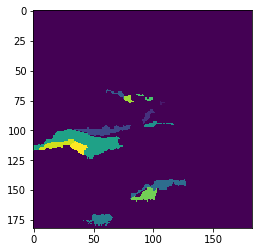

In [13]:
#irri
zi = np.loadtxt(os.path.join(ws,"zone_irr.txt"))
plt.imshow(zi)
pf.add_parameters(filenames="irr.txt",par_type="zone",zone_array=zi,
                   par_name_base="irr",pargp="irr",
                   upper_bound=2,lower_bound=0.8)

In [14]:
# kpms and kep
pf.add_parameters(filenames="kep.txt",par_type="constant",
                    par_name_base="ep",pargp="ep",
                    upper_bound=30,lower_bound=0.1)
pf.add_parameters(filenames="kpms.txt",par_type="constant",
                 par_name_base="pms",pargp="pms",upper_bound=30,lower_bound=0.05)

pf.add_parameters(filenames="kqm.txt",par_type="constant",
                 par_name_base="qm",pargp="qm",upper_bound=10,lower_bound=0.01)

2020-08-05 13:19:33.601519 starting: adding constant type multiplier style parameters for file(s) ['kep.txt']
2020-08-05 13:19:33.603519 starting: loading array template\kep.txt
2020-08-05 13:19:33.689516 finished: loading array template\kep.txt took: 0:00:00.085997
2020-08-05 13:19:33.689516 loaded array 'kep.txt' of shape (182, 183)
2020-08-05 13:19:33.785513 starting: writing array-based template file 'ep_inst0_constant.csv.tpl'
2020-08-05 13:19:33.786513 starting: writing template file ep_inst0_constant.csv.tpl for ['ep_inst:0']
2020-08-05 13:19:34.194500 finished: writing template file ep_inst0_constant.csv.tpl for ['ep_inst:0'] took: 0:00:00.407987
2020-08-05 13:19:34.196500 finished: writing array-based template file 'ep_inst0_constant.csv.tpl' took: 0:00:00.410987
2020-08-05 13:19:34.297498 starting: adding parameters for file(s) ['kep.txt']
2020-08-05 13:19:34.299497 starting: adding constant type multiplier style parameters for file(s) ['kpms.txt']
2020-08-05 13:19:34.299497 

### rivers

In [15]:
rivers = [riv for riv in os.listdir(template_ws) if riv.endswith("riv")]

In [16]:
def riv_tpl(rivers,tmp_ws):
    for riv in rivers:
        riv_file = os.path.join(tmp_ws,riv)
        tpl_file = riv_file+".tpl"
        copyfile(riv_file, tpl_file)
        
        with fileinput.FileInput(tpl_file, inplace=True) as file:
            for line in file:
                print(line.replace("    0.00500000   ", "~    c_{}     ~".format(riv.split(".")[0])), end='')
        with open(tpl_file, 'r+') as f:
            content = f.read()
            line = "ptf ~"
            f.seek(0, 0)
            f.write(line.rstrip('\r\n') + "\n" + content)
        
        #add parameter to control file
        dic = {"parnme":"c_{}".format(riv.split(".")[0]),
              "parval1": 0.005,
               "pargp": "cond",
               "tpl_filename": tpl_file,
               'input_filename':riv_file,
               "partype" : "constant",
               "partrans" : "log",
               "parubnd" : 0.01,
               "parlbnd" : 0.001,
               "parchglim" : "factor",
               "scale" : 1.0,
               "dercom" : 1,
               "offset" : 0.0} 
        a = pd.DataFrame(dic,index=["c_{}".format(riv.split(".")[0])])
        pf.par_dfs[0] = pf.par_dfs[0].append(a,sort=False)
        
        pf.tpl_filenames.append(riv+".tpl")
        pf.input_filenames.append(riv)

In [17]:
riv_tpl(rivers,template_ws)

In [18]:
pf.build_pst("{}.pst".format(case))

C:\Users\emmal\Anaconda3\lib\site-packages\pyemu\prototypes\pst_from.py:472: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  par_data = pd.concat(self.par_dfs).loc[:, par_data_cols]
C:\Users\emmal\Anaconda3\lib\site-packages\pyemu\prototypes\pst_from.py:127: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  ignore_index=True)


noptmax:30, npar_adj:275, nnz_obs:522


In [19]:
# add run model command
pf.mod_sys_cmds.append("..\..\..\exe\mf6")
pst = pf.build_pst("{}.pst".format(case))

noptmax:30, npar_adj:275, nnz_obs:522
2020-08-05 13:19:37.182412 forward_run line:pyemu.os_utils.run(r'..\..\..\exe\mf6')



2020-08-05 13:19:37.235406 starting: building prior covariance matrix
2020-08-05 13:19:37.419400 saving prior covariance matrix to file template\3D_test.prior.cov


C:\Users\emmal\Anaconda3\lib\site-packages\pyemu\utils\helpers.py:248: UserWarning: geostatistical_prior_builder() warning: geostruct sill != 1.0, user beware!
  warnings.warn("geostatistical_prior_builder() warning: geostruct sill != 1.0, user beware!")


2020-08-05 13:19:37.535397 finished: building prior covariance matrix took: 0:00:00.299991


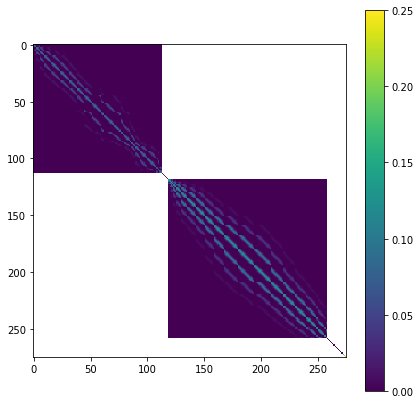

In [20]:
cov = pf.build_prior()
x = cov.x.copy()
x[x==0.0] = np.NaN
fig,ax = plt.subplots(1,1,figsize=(7,7))
g = ax.imshow(x)
plt.colorbar(g)

### Tikhonov

In [21]:

#setup first order tikho (preferred value regularization)
pyemu.helpers.first_order_pearson_tikhonov(pst,cov)

pst.prior_information

getting CC matrix
processing


pilbl  \
pilbl                
pcc_1        pcc_1   
pcc_2        pcc_2   
pcc_3        pcc_3   
pcc_4        pcc_4   
pcc_5        pcc_5   
...            ...   
pcc_4204  pcc_4204   
pcc_4205  pcc_4205   
pcc_4206  pcc_4206   
pcc_4207  pcc_4207   
pcc_4208  pcc_4208   

                                                                                 equation  \
pilbl                                                                                       
pcc_1          1.0 * log(kp_q_inst:0_i:4_j:139) - 1.0 * log(kp_q_inst:0_i:13_j:139) = 0.0   
pcc_2          1.0 * log(kp_q_inst:0_i:4_j:139) - 1.0 * log(kp_q_inst:0_i:22_j:139) = 0.0   
pcc_3          1.0 * log(kp_q_inst:0_i:4_j:139) - 1.0 * log(kp_q_inst:0_i:31_j:130) = 0.0   
pcc_4          1.0 * log(kp_q_inst:0_i:4_j:139) - 1.0 * log(kp_q_inst:0_i:31_j:139) = 0.0   
pcc_5         1.0 * log(kp_q_inst:0_i:13_j:139) - 1.0 * log(kp_q_inst:0_i:22_j:139) = 0.0   
...                                                                                   ...   
pcc_4204  1.0 * log(kp_pc_inst:0_i:157_j:121) - 1.0 * log(kp_pc_inst:0_i:157_j:139) = 0.0   
pcc_4205  1.0 * log(kp_pc_inst:0_i:157_j:121) - 1.0 * log(kp_pc_inst:0_i:166_j:103) = 0.0   
pcc_4206  1.0 * log(kp_pc_inst:0_i:157_j:130) - 1.0 * log(kp_pc_inst:0_i:157_j:139) = 0.0   
pcc_4207  1.0 * log(kp_pc_inst:0_i:157_j:130) - 1.0 * log(kp_pc_inst:0_i:166_j:103) = 0.0   
pcc_4208  1.0 * log(kp_pc_inst:0_i:157_j:139) - 1.0 * log(kp_pc_inst:0_i:166_j:103) = 0.0   

            obgnme    weight  
pilbl                         
pcc_1     regul_cc  0.634052  
pcc_2     regul_cc  0.161621  
pcc_3     regul_cc  0.005499  
pcc_4     regul_cc  0.016562  
pcc_5     regul_cc  0.634052  
...            ...       ...  
pcc_4204  regul_cc  0.148912  
pcc_4205  regul_cc  0.232701  
pcc_4206  regul_cc  0.493812  
pcc_4207  regul_cc  0.054150  
pcc_4208  regul_cc  0.001759  

[4208 rows x 4 columns]

In [26]:
pst.control_data.noptmax = -1 # FOR JACOBIAN
pst.write(os.path.join(template_ws,"{}.pst".format(case)))

noptmax:-1, npar_adj:275, nnz_obs:522


In [25]:
#pyemu.os_utils.run("..\..\pestpp-glm.exe {}".format(case),cwd="template")

In [27]:
m_d = "master_glm"

pyemu.os_utils.start_workers(template_ws,"../../pestpp-glm.exe","{}.pst".format(case),num_workers=10,worker_root=".",master_dir=m_d)

In [28]:
t_d ="master_glm"
case = "3D_test"
pst = pyemu.Pst(os.path.join(t_d,"{}.pst".format(case)))
pst.write_par_summary_table(filename="none")

#pst.svd_data.eigthresh = 5e-7
pst.control_data.noptmax = 8 # number of iterations (should be set to a great value (50))
pst.control_data.nphistp = 8
pst.pestpp_options["n_iter_base"] = -1
pst.pestpp_options["n_iter_super"] = 3
pst.pestpp_options["glm_num_reals"] = 50 # how many draws
pst.pestpp_options["parcov"] = "{}.prior.cov".format(case)
pst.pestpp_options["base_jacobian"] = "{}.jcb".format(case)
pst.write(os.path.join(t_d,"{}.pst".format(case)))

# DO the inversion
m_d = "master_glm_run"
pyemu.os_utils.start_workers(t_d,"../../pestpp-glm.exe","{}.pst".format(case),num_workers=10,worker_root=".",
                             master_dir=m_d)

noptmax:8, npar_adj:275, nnz_obs:522
